In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = base.classes.measurement
Station = base.classes.station


In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

Text(0, 0.5, 'Inches')

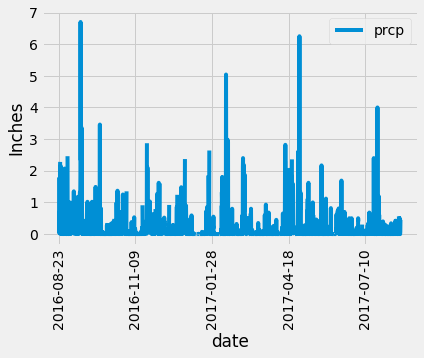

In [99]:
from datetime import date,timedelta
# Design a query to retrieve the last 12 months of precipitation data and plot the results
Measurements = session.query(Measurement.date,Measurement.prcp).all()
Measurements_df = pd.DataFrame(Measurements)
Measurements_df.head()
#print(Measurements)

# Calculate the date 1 year ago from the last data point in the database
session.query(func.max(Measurement.date)).all()[0][0]

last_date = date.fromisoformat(session.query(func.max(Measurement.date)).all()[0][0])
year = timedelta(days=365)
first_date = last_date - year

Measurements2 = session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date <= last_date, Measurement.date >= first_date).all()
Measurements2_df = pd.DataFrame(Measurements2)
Measurements2_df
# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data
new_df = Measurements2_df.set_index("date")
new_df.sort_values(by="date",inplace=True)
new_df.plot(rot=90)
plt.ylabel("Inches")

In [182]:
# Use Pandas to calcualte the summary statistics for the precipitation data
new_df.describe()
Measurements_df

,date,prcp
0,2010-01-01,0.08
1,2010-01-02,0.00
2,2010-01-03,0.00
3,2010-01-04,0.00
4,2010-01-06,NaN
...,...,...
19545,2017-08-19,0.09
19546,2017-08-20,NaN
19547,2017-08-21,0.56
19548,2017-08-22,0.50


In [135]:
# Design a query to show how many stations are available in this dataset?
Stations = session.query(Station.station, Station.name).all()
Stations_df = pd.DataFrame(Stations)
# Stations_df.count()[0]
# print(session.query(Station))

# SELECT station.id AS station_id, station.station AS station_station, station.name AS station_name,
# station.latitude AS station_latitude, station.longitude AS station_longitude, station.elevation AS station_elevation 
# FROM station

# for station in Stations:
#     print(station)
Stations_df.count()[0]


9

In [180]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order
sheet = temps_df.merge(Stations_df,on="station")
sheet

temps = session.query(Measurement.date, Measurement.tobs, Measurement.station).\
    filter(Measurement.date <= last_date, Measurement.date >= first_date).all()
temps_df =pd.DataFrame(temps)
temps_df["station"].value_counts()
# SELECT measurement.id AS measurement_id, measurement.station AS measurement_station, 
# measurement.date AS measurement_date, measurement.prcp AS measurement_prcp, measurement.tobs AS measurement_tobs 
# FROM measurement

sheet["station"].value_counts()

USC00519397    361
USC00519281    352
USC00516128    349
USC00513117    343
USC00519523    337
USC00514830    305
USC00517948    183
Name: station, dtype: int64

In [184]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
#session.query(func.max(Measurement.date)).all()[0][0]
highest_temp = session.query(Measurement.date, func.max(Measurement.tobs), Measurement.station).\
    filter(Measurement.date <= last_date, Measurement.date >= first_date, Measurement.station == "USC00519397").all()
lowest_temp = session.query(Measurement.date, func.min(Measurement.tobs), Measurement.station).\
    filter(Measurement.date <= last_date, Measurement.date >= first_date, Measurement.station == "USC00519397").all()
avg_temp = session.query(Measurement.date, func.avg(Measurement.tobs), Measurement.station).\
    filter(Measurement.date <= last_date, Measurement.date >= first_date, Measurement.station == "USC00519397").all()
highest_temp[0][1],lowest_temp[0][1],avg_temp[0][1]

(87.0, 60.0, 75.21052631578948)

Text(0.5, 0, 'Temperature')

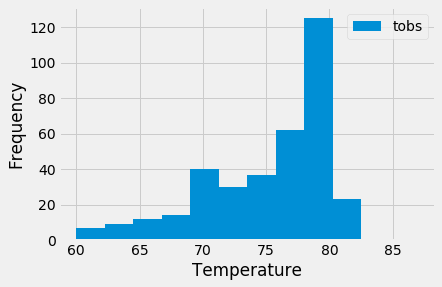

In [168]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
top_station = session.query(Measurement.date, Measurement.tobs, Measurement.station).\
    filter(Measurement.date <= last_date, Measurement.date >= first_date, Measurement.station == "USC00519397").all()
top_station_df = pd.DataFrame(top_station)
top_station_df.plot(kind='hist',bins=12)
plt.xlabel("Temperature")

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
